<a href="https://colab.research.google.com/github/Suvanga/-Stable-Roomate/blob/main/Improving_a_model_Neural_Network_Classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Neurral Network Classification with Pytorch
* Neural network is usewd to predict whether there somethinf is one thing or the other there can be multiple things as resource
* https://www.learnpytorch.io/02_pytorch_classification/

##Start from block 28 of the code

### 1. Make some data and get it Ready
* here we will take a custmom data set from sklearn

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

#Making a 1000 samples

n_samples = 1000

X, y = make_circles(n_samples, noise = 0.03, random_state= 42)



In [3]:
print(f"First 5 samples of X: \n {X[:5]}")
print(f"First 5 samples of y :\n{y[:5]}")

First 5 samples of X: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y :
[1 1 1 1 0]


In [4]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


#VISUALIZE
#VISUALIZE
#VISUALIZE

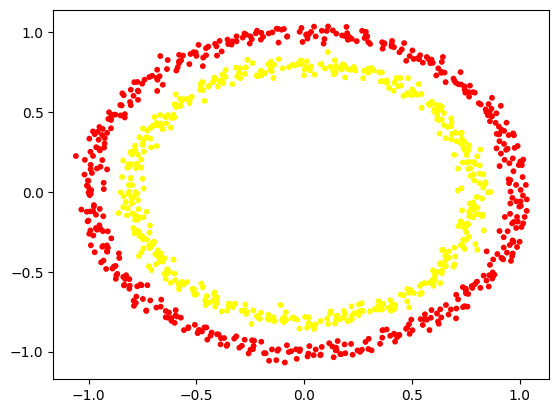

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            s=10,
            cmap='autumn')


##Making data features and labels visualization

In [6]:
#note we have created a toy data set, toy here refers to small fundamental data set, ourtprediction is like

X.shape, y.shape

print(f" X sample is  {X[0]} and the y value is {y[0]}")
print(f" X shape is  {(X[0]).shape} and the y value is {(y[0]).shape}")


 X sample is  [0.75424625 0.23148074] and the y value is 1
 X shape is  (2,) and the y value is ()


## 1.2 Creating a train and test Splits
1. CHanginf the dataset from numpy to float 32 which is in pytorch default dtype is float32, so we will be changing it into that

In [7]:
X.dtype, y.dtype

(dtype('float64'), dtype('int64'))

In [8]:
import torch
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)
split_data = 80


In [9]:
from sklearn.model_selection import train_test_split # Imported to split it

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 42)



In [10]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

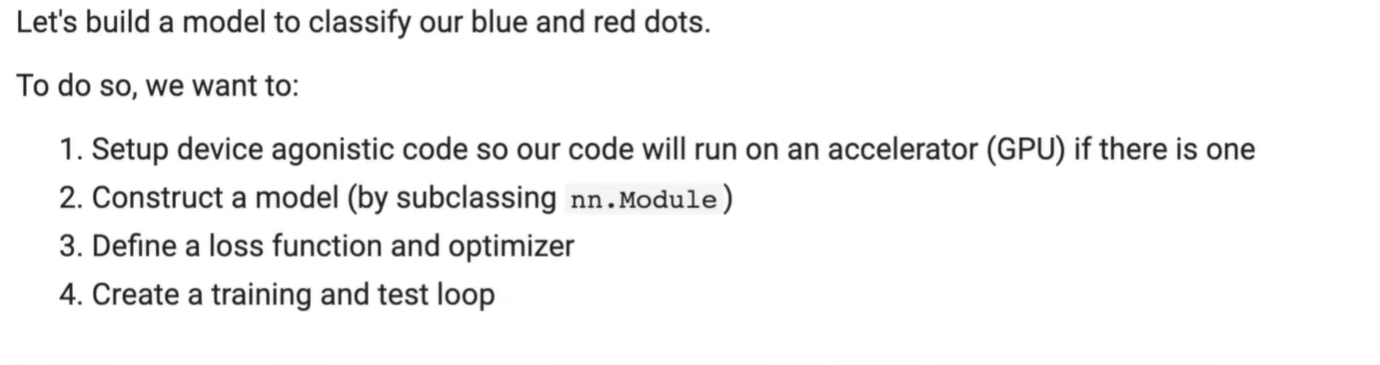

In [11]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

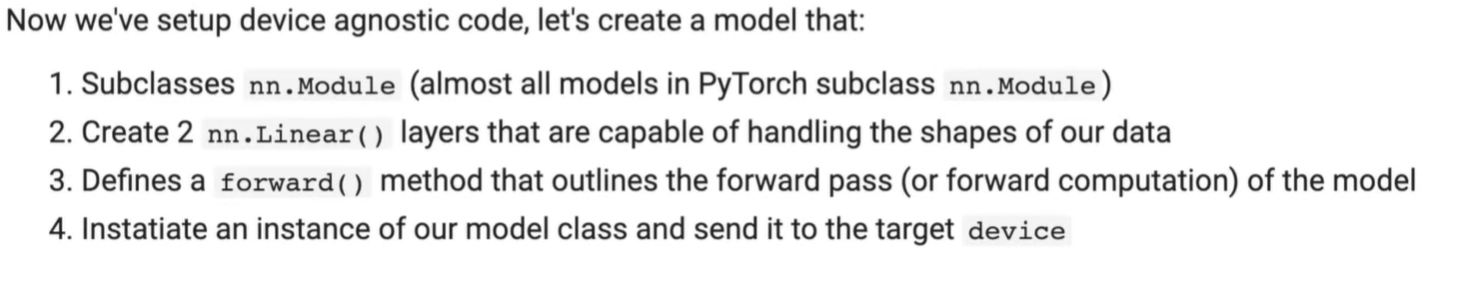

In [12]:
device , X_train.shape, X_train


('cpu',
 torch.Size([800, 2]),
 tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         ...,
         [ 0.0157, -1.0300],
         [ 1.0110,  0.1680],
         [ 0.5578, -0.5709]]))

In [13]:
# #make a subclass of nn.Moduole
# import torch
# from torch import nn
# class CircleModelV0(nn.Module):
#   def __init__(self):
#     super().__init__()
#     #Create linear layers capable of handling our imputs shape of our data
#     self.layer1 = nn.Linear(in_features = 2, out_features = 5, )#takes in 2 features and upscales it to 5 features
#     self.layer2 = nn.Linear(in_features= 5, out_features = 1)
#     # Takes in 5 features from previous layer and outputs a single feature which is same shape as y
#     #define a forward method that outlines the forward pass
#       #x->layer_1->layer_2->Output
#     def forward(self, x):
#       return self.layer2(self.layer1(x))
# #instantiante an instanvce o f the model class and send it to the device
# model_0 = CircleModelV0().to(device)

In [14]:

#change this to code to see it in action press ctrl+m twice
#make a subclass of nn.Moduole
import torch
from torch import nn
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.twoLinear_Layers = nn.Sequential(
nn.Linear(in_features= 2, out_features = 128),
nn.ReLU(),
nn.Linear(in_features = 128, out_features=256),
nn.ReLU(),
nn.Linear(in_features=256, out_features=128),
nn.ReLU(),
nn.Linear(in_features =128, out_features = 1).to(device))

    #define a forward method that outlines the forward pass
      #x->layer_1->layer_2->Output
    def forward(self, x):
      return self.twoLinear_Layers((x))
#instantiante an instanvce o f the model class and send it to the device
model_0 = CircleModelV0().to(device)



```
# This is formatted as code
```

#change this to code to see it in action press ctrl+m twice
#make a subclass of nn.Moduole
import torch
from torch import nn
class CircleModelV0(nn.Module):
  def __init__(self):  
    super().__init__()
    self.twoLinear_Layers = nn.Sequential(
nn.Linear(in_features= 2, out_features = 5),
nn.Linear(in_features = 5, out_features=1)).to(device)

    #define a forward method that outlines the forward pass
      #x->layer_1->layer_2->Output
    def forward(self, x):
      return self.twoLinear_Layers((x))
#instantiante an instanvce o f the model class and send it to the device
model_0 = CircleModelV0().to(device)

 ##Lets visualize the neural network for this we could use tensorflow and the link is :
https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.26973&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

* Sigmoid function works beast as this is a binaery classification problem
![image.png](
  

  
)

In [15]:
#lets try to create the same model with sequential
#It is the same thing as the above one, we can create custom forward pass witht the above model, but we can use nn.Sequeential too
model_0 = nn.Sequential(
nn.Linear(in_features= 2, out_features = 5),
nn.Linear(in_features = 5, out_features=1)).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5577, -0.6324],
                      [-0.6435, -0.5286],
                      [ 0.0150, -0.4381],
                      [ 0.6862,  0.0166],
                      [-0.4424, -0.5563]])),
             ('0.bias', tensor([-0.6579, -0.1175,  0.2094, -0.5302, -0.6410])),
             ('1.weight',
              tensor([[ 0.3514,  0.0599,  0.3121, -0.4114, -0.1435]])),
             ('1.bias', tensor([-0.0307]))])

In [17]:
#make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
  print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape} ")
  print(f"Length of test samples : {len(X_test)}, Shape : {X_test.shape}")
  print(f"First 10 predictions: {untrained_preds[:10]}")
  print(f"First 10 kabels {y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1]) 
Length of test samples : 200, Shape : torch.Size([200, 2])
First 10 predictions: tensor([[ 0.0581],
        [-0.2052],
        [ 0.5218],
        [-0.0723],
        [ 0.1622],
        [ 0.0043],
        [-0.4521],
        [-0.4040],
        [ 0.5363],
        [-0.2268]])
First 10 kabels tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [18]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

##2.1 Setup Loss function and the optimizer
* For regression we could prbably want MAE or MSQ
* We could possibly use cross entropy or categorical cross entropy

* For optimizers two of the most useful are SGD and Adams, we have many useful options if you visit torch.optim page in the pytorch documentation
*  Logits are passed through a Softmax function (for multi-class) or Sigmoid function (for binary) to transform them into probabilities that sum to 1.


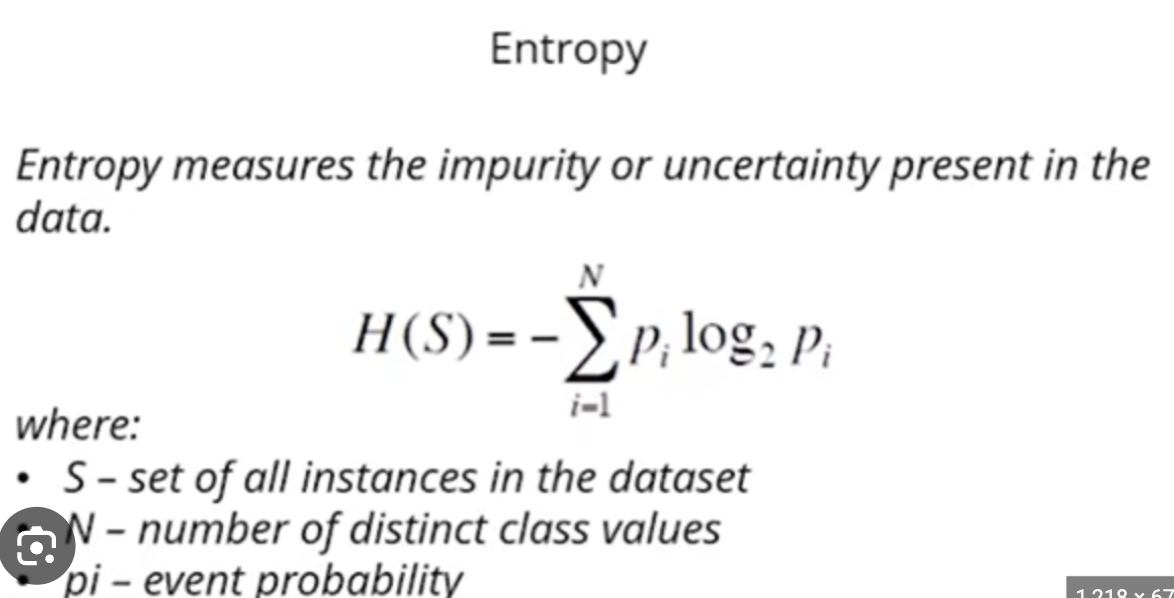

In [19]:
# loss_fn = nn.BCELoss() #this is also an alternative, this requires inputs to have gone throughthe sigmoid activation function prior to imput to BCELoss
loss_fn = nn.BCEWithLogitsLoss() #this is for multiclass classification and also it has sigmoid activation function built in
optimizer = torch.optim.SGD(params = model_0.parameters(), lr =0.1)

##2.2 Setup Accuracy function
* This gives true positive %

In [20]:
#Calculate aaccuracy : Out of 100 how many of our model gets right ?
def accuracy_fn(y_true, y_pred):
  correct =torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

#3. Train the model
1. Forward pass
2. Calculate the loss
3. Loss backward AKA back propagation
4. Gradient descent

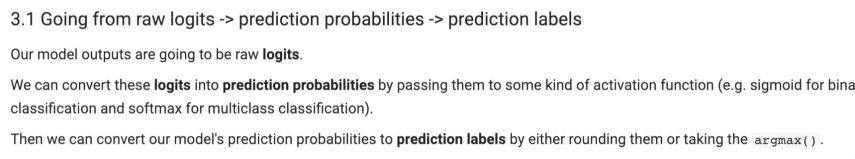

In [21]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.0581],
        [-0.2052],
        [ 0.5218],
        [-0.0723],
        [ 0.1622]])

In [22]:
#Using sigmoid activation to turn them in to prections probablities
y_pred_probs = torch.sigmoid(y_logits)
torch.round(y_pred_probs)

tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.]])

In [23]:
#finding the predicted labels
y_preds = torch.round(y_pred_probs)


#Doing it Directly

In [24]:

#in full logits->pred_probs->pred labels
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

y_preds.squeeze(dim=1)

tensor([True, True, True, True, True])


tensor([1., 0., 1., 0., 1.])

In [25]:
##Building and training and testing loop

torch.cuda.manual_seed(42)
torch.manual_seed(42)
 #setting number of epochs
epochs = 1000
X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

 #loop through epochs
for epoch in range(epochs):
    ##Training
  model_0.train()

  #1. Forward pass
  y_logits = model_0(X_train).squeeze(dim=1)
  y_pred = torch.round(torch.sigmoid(y_logits)) #logits->round->sigmoids

  #2. Loss accuracy

  #if we use BCEloss only we can possibly use this funciton
  # loss = loss_fn(torch.sigmoid(y_logits), y_train)
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true = y_train, y_pred= y_pred)

  #3.optimizer 0
  optimizer.zero_grad()

  #4.loss backward
  loss.backward()

  #5.optimizer step
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
  #forward pass
    test_logits = model_0(X_test).squeeze(dim=1)
    test_pred = torch.round(torch.sigmoid(test_logits))
  #test accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred) #scikit learn metrics package takes parameters in reverse order

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Train Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.71253, Train Accuracy: 50.38% | Test Loss: 0.69820, Test Accuracy: 52.50%
Epoch: 10 | Loss: 0.70542, Train Accuracy: 50.12% | Test Loss: 0.69440, Test Accuracy: 52.50%
Epoch: 20 | Loss: 0.70105, Train Accuracy: 50.38% | Test Loss: 0.69253, Test Accuracy: 51.50%
Epoch: 30 | Loss: 0.69828, Train Accuracy: 50.38% | Test Loss: 0.69171, Test Accuracy: 52.00%
Epoch: 40 | Loss: 0.69649, Train Accuracy: 50.50% | Test Loss: 0.69146, Test Accuracy: 52.00%
Epoch: 50 | Loss: 0.69532, Train Accuracy: 51.00% | Test Loss: 0.69152, Test Accuracy: 51.00%
Epoch: 60 | Loss: 0.69454, Train Accuracy: 51.12% | Test Loss: 0.69174, Test Accuracy: 51.00%
Epoch: 70 | Loss: 0.69403, Train Accuracy: 51.12% | Test Loss: 0.69203, Test Accuracy: 50.00%
Epoch: 80 | Loss: 0.69369, Train Accuracy: 51.38% | Test Loss: 0.69234, Test Accuracy: 50.00%
Epoch: 90 | Loss: 0.69346, Train Accuracy: 52.00% | Test Loss: 0.69265, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69330, Train Accuracy: 51.50% | Test Los

##predictions with the models using matplotlib aka `plot_decision_boundary()`


In [28]:
import requests
from pathlib import Path

#download helper function from learnpytorch repository
if Path("helper_functions.py").is_file():
  print("it exists skip downloading")
  from helper_functions import plot_predictions, plot_decision_boundary
else:
  print("Download Helper function.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)





it exists skip downloading


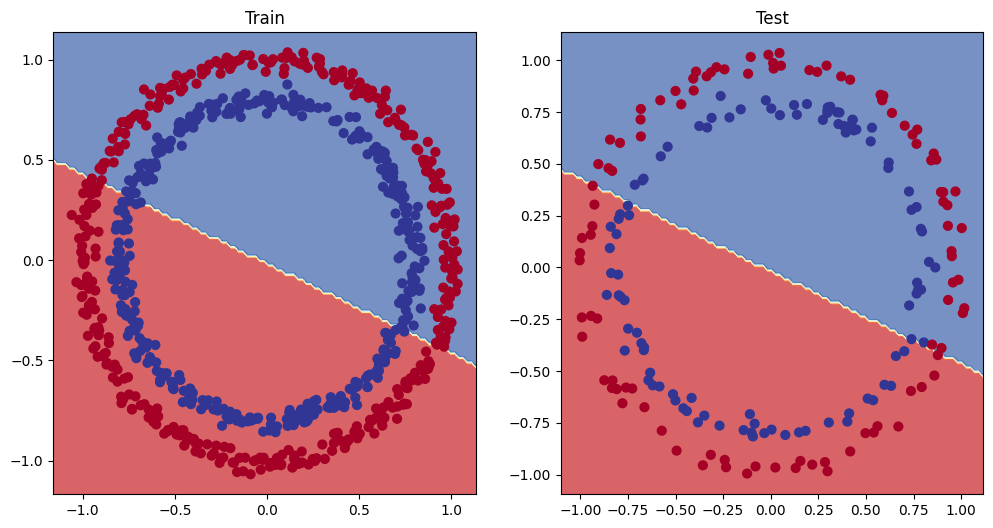

In [29]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

##Improve the model

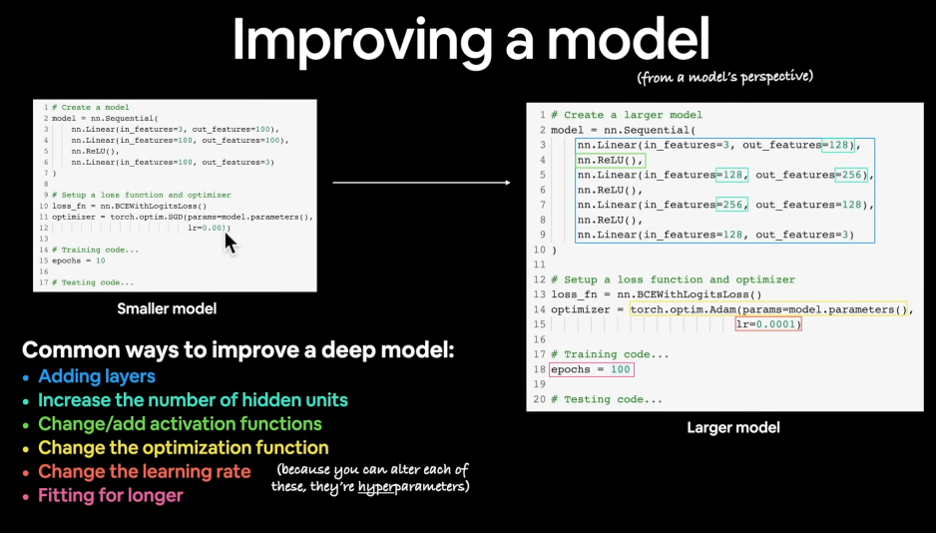

In [30]:
##New model

class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(2, 10)
    self.layer2 = nn.Linear(10,10)
    self.layer3 = nn.Linear(10,1)

  def forward(self,x) -> torch.Tensor:
    return self.layer3((self.layer2((self.layer1(x)))))


In [31]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
#create a model
model_1 = CircleModelV1().to(device)
#create a loss funcrion
loss_fn2 = nn.BCEWithLogitsLoss()
#create an optimizer
optimizer2 = torch.optim.SGD(params =model_1.parameters(), lr =0.01)
#write a training and evaluation code at once
epochs = 1000
model_1.train()


for epoch in range(epochs):
    #do the forward pass
    model_1.train()
    y_logits = model_1(X_train).squeeze(dim=1)
    y_pred2 = torch.round(torch.sigmoid(y_logits))

  #Calculate the loss
    loss = loss_fn2(y_logits, y_train)
    accuracy2 = accuracy_fn(y_true = y_train, y_pred = y_pred2)

  #optimizer
    optimizer2.zero_grad()

  #loss for backward propagation
    loss.backward()

  #gradient descents
    optimizer2.step()

    with torch.inference_mode():
      model_1.eval()
      test_logits = model_1(X_test).squeeze(dim=1)
      test_pred = torch.round(torch.sigmoid(test_logits))
      test_loss = loss_fn2(test_logits, y_test)
      test_acc = accuracy_fn(y_test, test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Train Accuracy: {accuracy2:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")




Epoch: 0 | Loss: 0.69396, Train Accuracy: 50.88% | Test Loss: 0.69261, Test Accuracy: 51.00%
Epoch: 100 | Loss: 0.69369, Train Accuracy: 50.25% | Test Loss: 0.69269, Test Accuracy: 50.00%
Epoch: 200 | Loss: 0.69351, Train Accuracy: 50.12% | Test Loss: 0.69282, Test Accuracy: 49.50%
Epoch: 300 | Loss: 0.69339, Train Accuracy: 50.50% | Test Loss: 0.69295, Test Accuracy: 49.00%
Epoch: 400 | Loss: 0.69329, Train Accuracy: 50.38% | Test Loss: 0.69309, Test Accuracy: 48.50%
Epoch: 500 | Loss: 0.69322, Train Accuracy: 49.88% | Test Loss: 0.69322, Test Accuracy: 49.50%
Epoch: 600 | Loss: 0.69317, Train Accuracy: 49.50% | Test Loss: 0.69335, Test Accuracy: 53.00%
Epoch: 700 | Loss: 0.69313, Train Accuracy: 49.38% | Test Loss: 0.69347, Test Accuracy: 50.50%
Epoch: 800 | Loss: 0.69309, Train Accuracy: 50.00% | Test Loss: 0.69358, Test Accuracy: 51.00%
Epoch: 900 | Loss: 0.69307, Train Accuracy: 50.62% | Test Loss: 0.69368, Test Accuracy: 47.50%


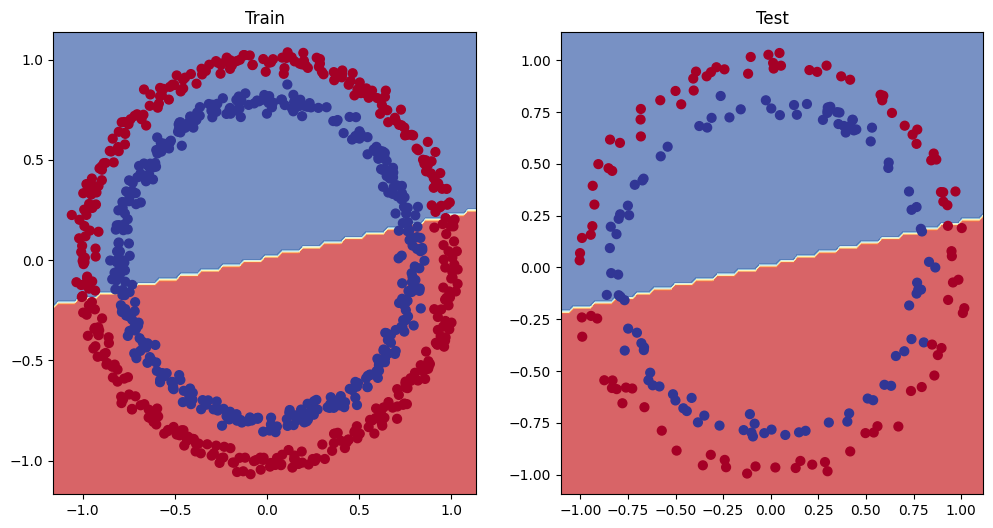

In [32]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [33]:

# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear regression formula (without epsilon)

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]
     # Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split].to(device), y_regression[:train_split].to(device)
X_test_regression, y_test_regression = X_regression[train_split:].to(device), y_regression[train_split:].to(device)

# Check the lengths of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

100


(80, 20, 80, 20)

In [34]:
model_2_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

loss_fn2 = nn.L1Loss()
optimizer2 = torch.optim.SGD(params=model_2_2.parameters(), lr=0.01)
model_2 =model_2_2.to(device)

In [35]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn2(y_pred, y_train_regression)
  optimizer2.zero_grad()
  loss.backward()
  optimizer2.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  # Print out what's happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.57896 | Test loss: 0.64990
Epoch: 100 | Loss: 0.03496 | Test loss: 0.40036
Epoch: 200 | Loss: 0.03268 | Test loss: 0.40096
Epoch: 300 | Loss: 0.02942 | Test loss: 0.40122
Epoch: 400 | Loss: 0.02731 | Test loss: 0.40149
Epoch: 500 | Loss: 0.02672 | Test loss: 0.40142
Epoch: 600 | Loss: 0.02627 | Test loss: 0.40136
Epoch: 700 | Loss: 0.02594 | Test loss: 0.40133
Epoch: 800 | Loss: 0.02482 | Test loss: 0.40111
Epoch: 900 | Loss: 0.02333 | Test loss: 0.40126


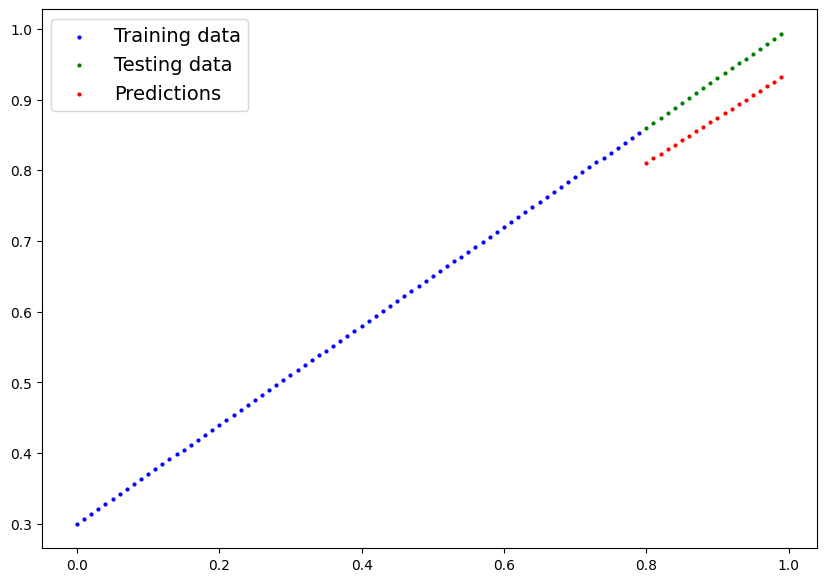

In [36]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# Plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

##The missing piece aka Non linearity
"What patterns could I draw if I were to be ginven a number of infinite amount of strainght and non staright lines
* In machine learning terms it is called infinite of linear and nonlinear dunction.... Think about it

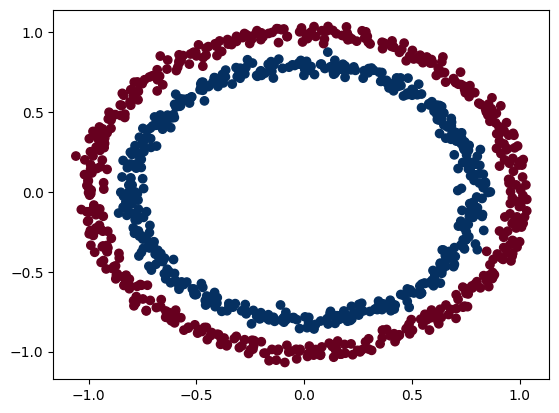

In [37]:
##Recreating Non linear data R & B circles
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples =1000
X , y = make_circles(n_samples,
                     noise = 0.03,
                     random_state=42)

plt.scatter(X[:,0],X[:,1], c=y, cmap =plt.cm.RdBu)

In [38]:
import torch
from sklearn.model_selection import train_test_split

#splitting
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42)



In [39]:
from torch import nn
class CircleModelV4(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() #Relu is one of the non linear activcation function

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))




In [40]:
model_4 = CircleModelV4().to(device)

In [42]:

Loss = nn.BCEWithLogitsLoss().to(device)
optimizer = torch.optim.SGD(params = model_4.parameters(), lr=0.1)
X_train.to(device)
y_train.to(device)
X_test.to(device)
y_test.to(device)



tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 1.])

In [43]:
#Calculate aaccuracy : Out of 100 how many of our model gets right ?
def accuracy_fn(y_true, y_pred):
  correct =torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

In [45]:
#training
Epochs = 1000

model_4.to(device)
for epoch in range(Epochs):
  model_4.train()
  # 1. Forward pass
  y_logits = model_4(X_train.to(device)).squeeze(dim = 1)
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate loss
  loss = Loss(y_logits, y_train.to(device))

  # 3. Calculate accuracy
  correct = torch.eq(y_train.to(device), y_pred).sum().item()
  accuracy = (correct / len(y_pred)) * 100

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #tesdting
  model_4.eval()
  with torch.inference_mode():
      test_logits = model_4(X_test.to(device)).squeeze(dim=1)
      test_pred = torch.round(torch.sigmoid(test_logits))
      test_loss = Loss(test_logits, y_test.to(device))
      test_correct = torch.eq(y_test.to(device), test_pred).sum().item()
      test_accuracy = (test_correct / len(test_pred)) * 100

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {accuracy:.2f} | Loss: {test_loss:.5f}, Test_Accuracy:{test_accuracy:.2f}")


Epoch: 0 | Loss: 0.56818, Accuracy: 87.75 | Loss: 0.57378, Test_Accuracy:86.50
Epoch: 100 | Loss: 0.48153, Accuracy: 93.50 | Loss: 0.49935, Test_Accuracy:90.50
Epoch: 200 | Loss: 0.37056, Accuracy: 97.75 | Loss: 0.40595, Test_Accuracy:92.00
Epoch: 300 | Loss: 0.25458, Accuracy: 99.00 | Loss: 0.30333, Test_Accuracy:96.50
Epoch: 400 | Loss: 0.17180, Accuracy: 99.50 | Loss: 0.22108, Test_Accuracy:97.50
Epoch: 500 | Loss: 0.12188, Accuracy: 99.62 | Loss: 0.16512, Test_Accuracy:99.00
Epoch: 600 | Loss: 0.09123, Accuracy: 99.88 | Loss: 0.12741, Test_Accuracy:99.50
Epoch: 700 | Loss: 0.07100, Accuracy: 99.88 | Loss: 0.10319, Test_Accuracy:99.50
Epoch: 800 | Loss: 0.05773, Accuracy: 99.88 | Loss: 0.08672, Test_Accuracy:99.50
Epoch: 900 | Loss: 0.04853, Accuracy: 99.88 | Loss: 0.07474, Test_Accuracy:99.50


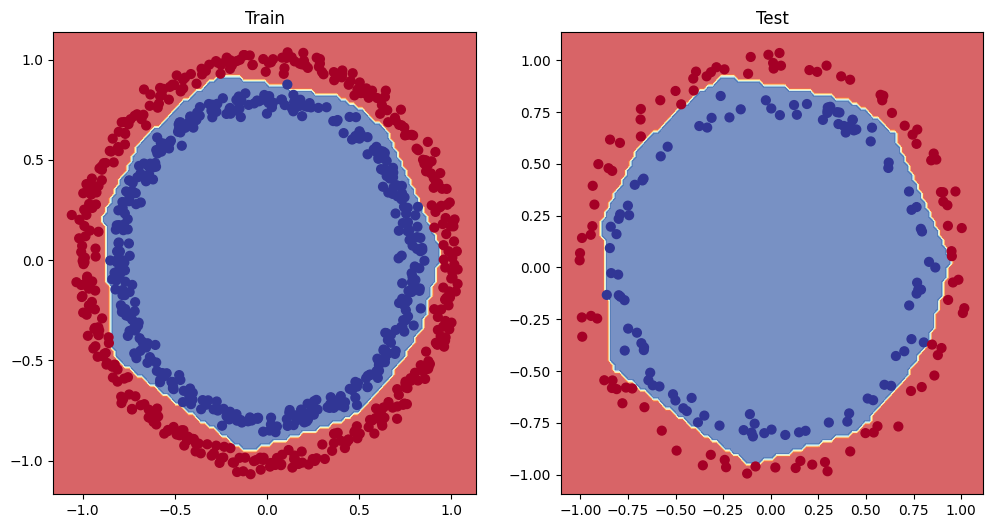

In [46]:
  plt.figure(figsize=(12,6))
  plt.subplot(1,2,1)
  plt.title("Train")
  plot_decision_boundary(model_4, X_train, y_train)
  plt.subplot(1,2,2)
  plt.title("Test")
  plot_decision_boundary(model_4, X_test, y_test)